In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# Cargar datos
train = pd.read_csv(r"C:\Users\Mgh59\OneDrive\Escritorio\Clave Python SQL\Portafolio\Regresion Lineal\train.csv")
test = pd.read_csv(r"C:\Users\Mgh59\OneDrive\Escritorio\Clave Python SQL\Portafolio\Regresion Lineal\test.csv")

In [12]:
# Eliminar columnas innecesarias
train = train.drop(columns='Alley', errors='ignore')
test = test.drop(columns='Alley', errors='ignore')

In [13]:
# Imputación de valores nulos numéricos
for col in train.select_dtypes(include=[np.number]).columns:
    train[col].fillna(train[col].mean(), inplace=True)
    if col in test.columns:
        test[col].fillna(test[col].mean(), inplace=True)

C:\Users\Mgh59\AppData\Local\Temp\ipykernel_10136\1688735362.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].mean(), inplace=True)
C:\Users\Mgh59\AppData\Local\Temp\ipykernel_10136\1688735362.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [14]:
# Codificar variables categóricas
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [15]:
# Alinear columnas de train y test
train, test = train.align(test, join='left', axis=1, fill_value=0)

# Separar features y target
X = train.drop(columns=['SalePrice', 'Id'], errors='ignore')
y = train['SalePrice']

In [16]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [18]:
# Métricas
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MSE Random Forest: {mse_rf:.2f}")
print(f"RMSE Random Forest: {rmse_rf:.2f}")
print(f"R² Random Forest: {r2_rf:.3f}")

MSE Random Forest: 814673917.47
RMSE Random Forest: 28542.49
R² Random Forest: 0.894


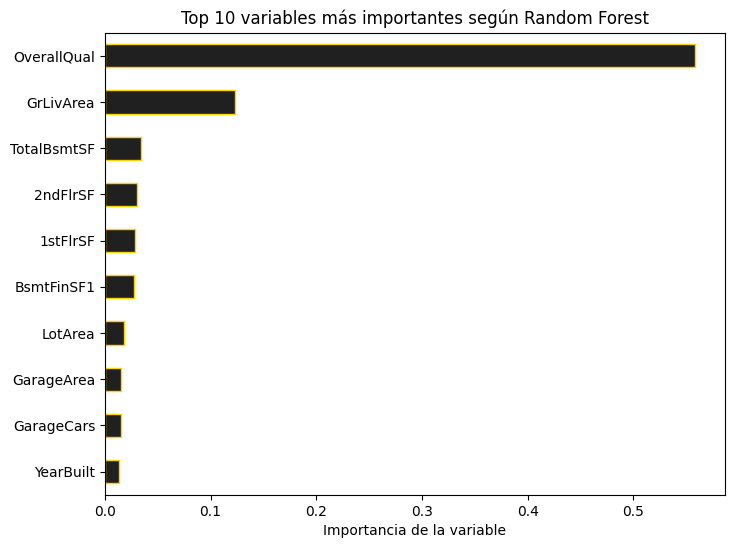

In [24]:
# Top 10 variables más importantes según Random Forest
import matplotlib.pyplot as plt
importances = pd.Series(rf.feature_importances_, index=X.columns)
top10_importances = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
top10_importances.sort_values().plot(kind='barh', color='#202020', edgecolor='#ffd100')
plt.xlabel("Importancia de la variable")
plt.title("Top 10 variables más importantes según Random Forest")
plt.show();


C:\Users\Mgh59\AppData\Local\Temp\ipykernel_10136\1151194507.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', color='#ffd100')  # línea ideal


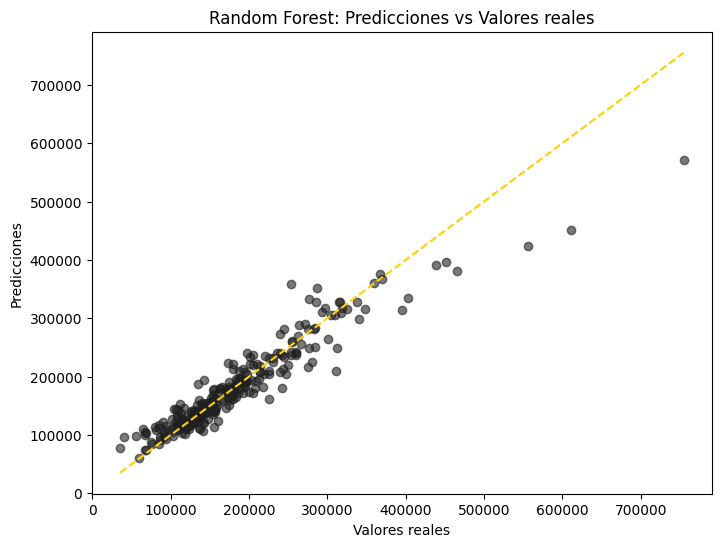

In [22]:
# Predicciones vs Valores reales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='#202020')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', color='#ffd100')  # línea ideal
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Random Forest: Predicciones vs Valores reales")
plt.show();

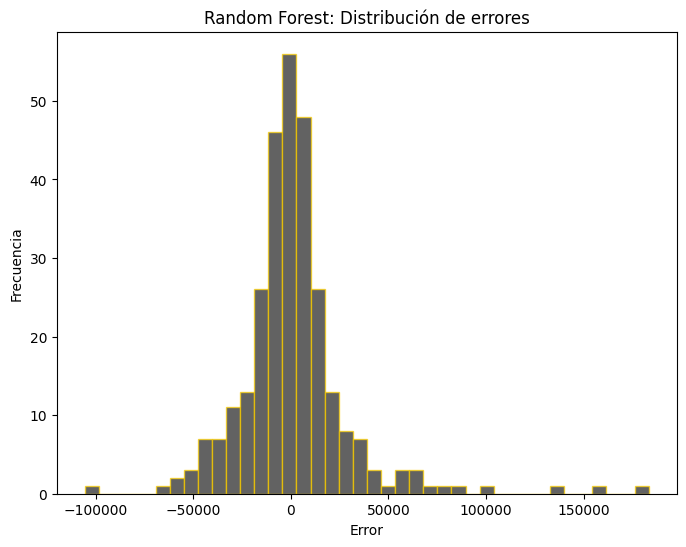

In [23]:
# Distribución de errores (residuals)
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(8,6))
plt.hist(residuals_rf, bins=40, color='#202020',edgecolor='#ffd100', alpha=0.7)
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.title("Random Forest: Distribución de errores")
plt.show();


In [3]:
# Crear un dataframe con valores reales y predicciones
df_results = pd.DataFrame({
    'Valores_reales': y_test,
    'Predicciones_RF': y_pred_rf,
    'Residuals': y_test - y_pred_rf
})

# Guardarlo a CSV
df_results.to_csv("C:\\Users\\Mgh59\\OneDrive\\Escritorio\\rf_results.csv", index=False)


In [4]:
top10_importances.to_csv("C:\\Users\\Mgh59\\OneDrive\\Escritorio\\top10_importances.csv")
